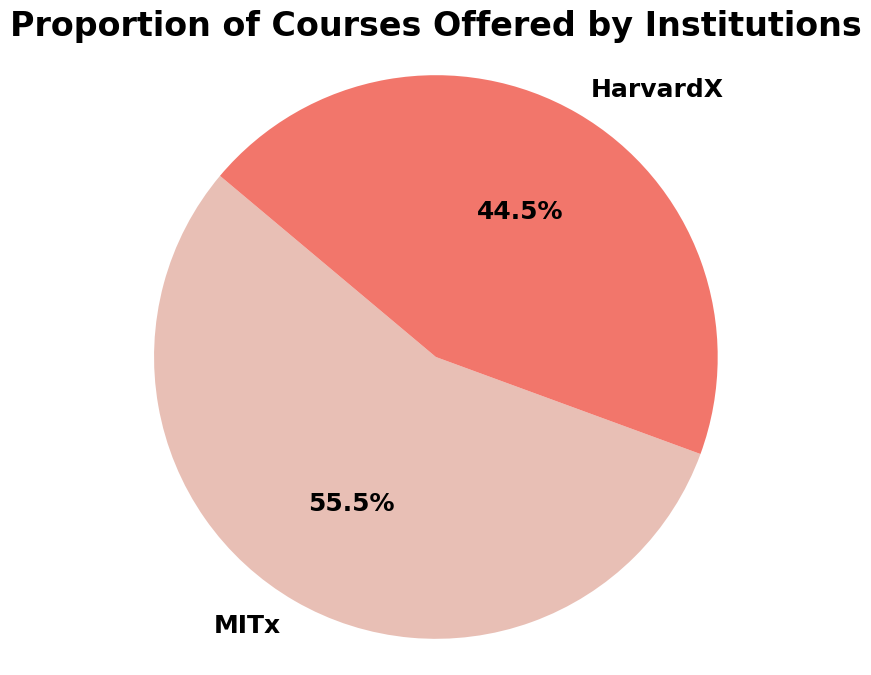

In [27]:
#Proportion of Courses Offered by Institutions

import matplotlib.pyplot as plt
import pandas as pd

# Načtení dat z tabulky "kurzy_cleaned.csv"
data = pd.read_csv("kurzy_cleaned.csv")

# Data pro pie chart
institutions = ["MITx", "HarvardX"]
courses_offered = [
    data[data["Institution"] == institution].shape[0] 
    for institution in institutions
]
colors = ['#e8bfb5', '#F2766B']  # Barvy

# Vytvoření pie chartu
plt.figure(figsize=(8, 8))
plt.pie(
    courses_offered,
    labels=institutions,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 18, 'fontweight': 'bold', 'color': 'black'}
)
# Nastavení nadpisu
plt.title("Proportion of Courses Offered by Institutions", fontsize=24, fontweight='bold', pad=10)

# Zajištění kruhového tvaru
plt.axis('equal')

# Uložení grafu
plt.savefig("Proportion_of_Courses_Offered_by_Institutions.png", bbox_inches='tight')

# Zobrazení grafu
plt.show()

C:\Users\danto\AppData\Local\Temp\ipykernel_7172\4128829348.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_3_unique_courses['Course_Info'] = (
C:\Users\danto\AppData\Local\Temp\ipykernel_7172\4128829348.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_3_unique_courses['Course_Info'] = top_3_unique_courses['Course_Info'].replace(


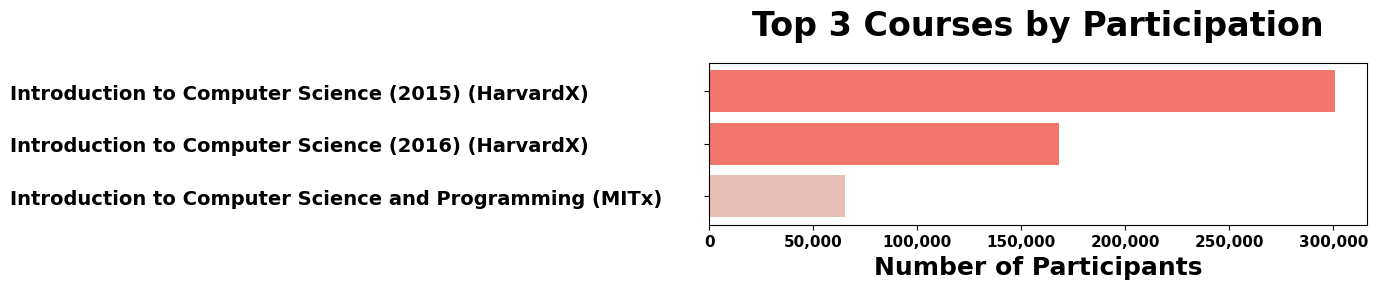

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import StrMethodFormatter

# Načtení dat z CSV souboru
# Data obsahují informace o různých kurzech a jejich účastnících
data = pd.read_csv("kurzy_cleaned.csv")

# Seřadíme data podle počtu účastníků v kurzech, od nejvyššího po nejnižší
sorted_data = data.sort_values(by='Participants_(Course_Content_Accessed)', ascending=False)

# Odstraníme duplicitní kurzy (kurzy se stejným názvem) a zachováme pouze první výskyt každého kurzu
unique_courses = sorted_data.drop_duplicates(subset='Course_Title', keep='first')

# Vybereme pouze první tři kurzy (top 3) podle počtu účastníků
top_3_unique_courses = unique_courses.iloc[:3]

# Přidáme k názvům kurzů informaci o instituci (např. HarvardX nebo MITx)
# Výsledek bude například "Introduction to Computer Science (HarvardX)"
top_3_unique_courses['Course_Info'] = (
    top_3_unique_courses['Course_Title'] + " (" + top_3_unique_courses['Institution'] + ")"
)

# Přejmenujeme specifický kurz, aby obsahoval rok 2015
top_3_unique_courses['Course_Info'] = top_3_unique_courses['Course_Info'].replace(
    'Introduction to Computer Science (HarvardX)', 
    'Introduction to Computer Science (2015) (HarvardX)'
)

# Vytvoříme mapování barev pro instituce (MITx a HarvardX) podle preferovaných barev
color_mapping = {'MITx': '#e8bfb5', 'HarvardX': '#F2766B'}
# Přiřadíme barvy kurzům podle toho, ke které instituci patří
colors = top_3_unique_courses['Institution'].map(color_mapping)

# Nastavíme velikost grafu (šířka = 14, výška = 3)
plt.figure(figsize=(14, 3))

# Vytvoříme horizontální sloupcový graf
# Na ose y budou názvy kurzů a na ose x počet účastníků
bars = plt.barh(
    top_3_unique_courses['Course_Info'],  # Popisky osy y (kurzy)
    top_3_unique_courses['Participants_(Course_Content_Accessed)'],  # Hodnoty osy x (počet účastníků)
    color=colors  # Barvy sloupců
)

# Přidáme název grafu
plt.title('Top 3 Courses by Participation', 
          fontsize=24, fontweight='bold', pad=20, loc='center')  # Nastavení fontu a zarovnání
# Popisek osy x
plt.xlabel('Number of Participants', fontsize=18, fontweight='bold')
# Popisek osy y není potřeba, protože sloupce mají popisky

# Zvýšíme velikost a tučnost textu na ose y (názvy kurzů)
plt.yticks(fontsize=14, fontweight='bold', ha='left')

# Posuneme popisky osy y dál od grafu
ax = plt.gca()  # Získáme aktuální graf
ax.tick_params(axis='y', pad=500)  # Posuneme popisky doleva o 500 bodů

# Přidáme prostor na levé straně grafu pro dlouhé názvy kurzů
plt.subplots_adjust(left=0.6)

# Na ose x formátujeme čísla tak, aby oddělovala tisíce čárkou (např. 10,000)
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# Zvýšíme velikost a tučnost čísel na ose x
plt.gca().tick_params(axis='x', labelsize=11)  # Velikost textu
for label in plt.gca().get_xticklabels():  # Pro každý popisek osy x
    label.set_fontweight('bold')  # Nastavíme tučnost

# Obrátíme pořadí osy y, aby nejpopulárnější kurz byl nahoře
plt.gca().invert_yaxis()

# Automaticky nastavíme rozložení prvků v grafu tak, aby vše sedělo
plt.tight_layout()

# Uložení grafu jako obrázku ve formátu PNG
plt.savefig("top_3_courses.png", dpi=300, bbox_inches='tight')

# Zobrazíme graf
plt.show()



